Load in the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load in the tracker data file.

In [3]:
read_in_array = np.loadtxt('/content/gdrive/MyDrive/2021-2022/22Winter/4AL/Python References/2.1 Ball Drop Tracker/Full Speed Drop.csv',delimiter=',',skiprows=2)

Separate the data into time and position

In [13]:
time = read_in_array[:,0]

position = read_in_array[:,1]

Use polyfit to find the the value of g with error.

Acceleration due to Gravity = -9.097 m/s^2.
Error in g = +/- 0.186 m/s^2.


Text(0.5, 1.0, 'Ball Drop Free Fall')

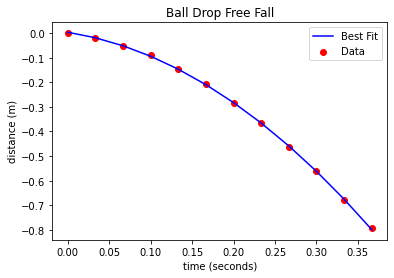

In [57]:
results, cov = np.polyfit(time,position,2,cov=True)

g = np.around(2*results[0],3)
print('Acceleration due to Gravity = ' + str(g) + ' m/s^2.')

# square root of cov[0,0] gives the error in results[0], use this to find the error in g
g_error = np.around(2*(cov[0,0]**.5),3)
print('Error in g = +/- ' + str(g_error) + ' m/s^2.')

plt.scatter(time, position, color = 'red', label = 'Data')
plt.plot(time, results[0]*time**2. + results[1]*time + results[2], color = 'blue', label = 'Best Fit')
plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('distance (m)')
plt.title('Ball Drop Free Fall')

np.gradient() can be used to differentiate the position to get the velocity. In the case of np.gradient(), the y-axis value must be mentioned first and then the x-axis value.

In [53]:
velocity = np.gradient(position, time)

We can also extract the value of g from the velocity plot using polyfit of degree 1.

Acceleration due to Gravity = -8.488 m/s^2.
Error in g = +/- 0.342 m/s^2.


Text(0.5, 1.0, 'Ball Drop Free Fall')

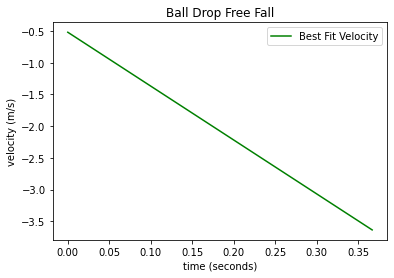

In [58]:
results_velocity, cov_velocity = np.polyfit(time,velocity,1,cov=True)

# Extract the value of g
g_new = np.around(results_velocity[0],3)
print('Acceleration due to Gravity = ' + str(g_new) + ' m/s^2.')

# square root of cov[0,0] gives the error in results[0], use this to find the error in g
g_new_error = np.around((cov_velocity[0,0]**.5),3)
print('Error in g = +/- ' + str(g_new_error) + ' m/s^2.')

plt.plot(time, results_velocity[0]*time + results[1], color = 'green', label = 'Best Fit Velocity')
plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('velocity (m/s)')
plt.title('Ball Drop Free Fall')